In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import calendar

In [3]:
cwd = os.getcwd()
data_folder = os.path.join(cwd, "sales_forecasting_data")

df = pd.read_csv(os.path.join(data_folder, "clean_train.csv"))

In [4]:
df

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,city,state,type_x,cluster,transactions,dcoilwtico,holiday
0,200,2013-01-01,25,463598,3.0,False,CLEANING,3024,0,Salinas,Santa Elena,D,1,770.0,93.14,True
1,517,2013-01-01,25,1047686,1.0,False,BEVERAGES,1120,0,Salinas,Santa Elena,D,1,770.0,93.14,True
2,460,2013-01-01,25,936994,2.0,False,GROCERY I,1004,0,Salinas,Santa Elena,D,1,770.0,93.14,True
3,277,2013-01-01,25,586969,1.0,False,GROCERY I,1004,0,Salinas,Santa Elena,D,1,770.0,93.14,True
4,317,2013-01-01,25,683722,1.0,False,GROCERY I,1062,0,Salinas,Santa Elena,D,1,770.0,93.14,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25593623,125453739,2017-08-15,34,1004551,1.0,False,"LIQUOR,WINE,BEER",1318,0,Guayaquil,Guayas,B,6,2007.0,47.57,True
25593624,125450647,2017-08-15,32,557257,2.0,False,EGGS,2502,1,Guayaquil,Guayas,C,3,615.0,47.57,True
25593625,125465865,2017-08-15,41,510054,4.0,False,GROCERY I,1072,0,Machala,El Oro,D,4,1003.0,47.57,True
25593626,125453890,2017-08-15,34,1147731,5.0,False,AUTOMOTIVE,6806,0,Guayaquil,Guayas,B,6,2007.0,47.57,True


Text(0.5, 1.0, 'Total Sales Over Time')

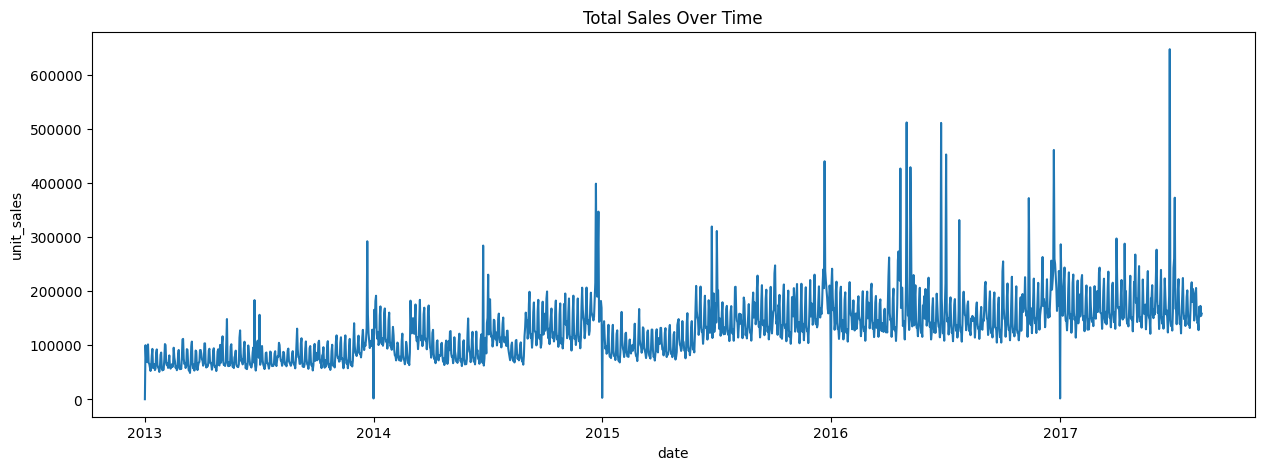

In [9]:
df['date'] = pd.to_datetime(df['date'])
daily_sales = df.groupby('date')['unit_sales'].sum().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(data=daily_sales, x='date', y='unit_sales')
plt.title("Total Sales Over Time")

In [8]:
df.groupby('onpromotion')['unit_sales'].mean()

onpromotion
False     8.247679
True     13.433940
Name: unit_sales, dtype: float64

In [9]:
df.groupby('holiday')['unit_sales'].mean()

holiday
False    8.550182
True     8.782232
Name: unit_sales, dtype: float64

Text(0.5, 1.0, 'Average Sales by Item Family')

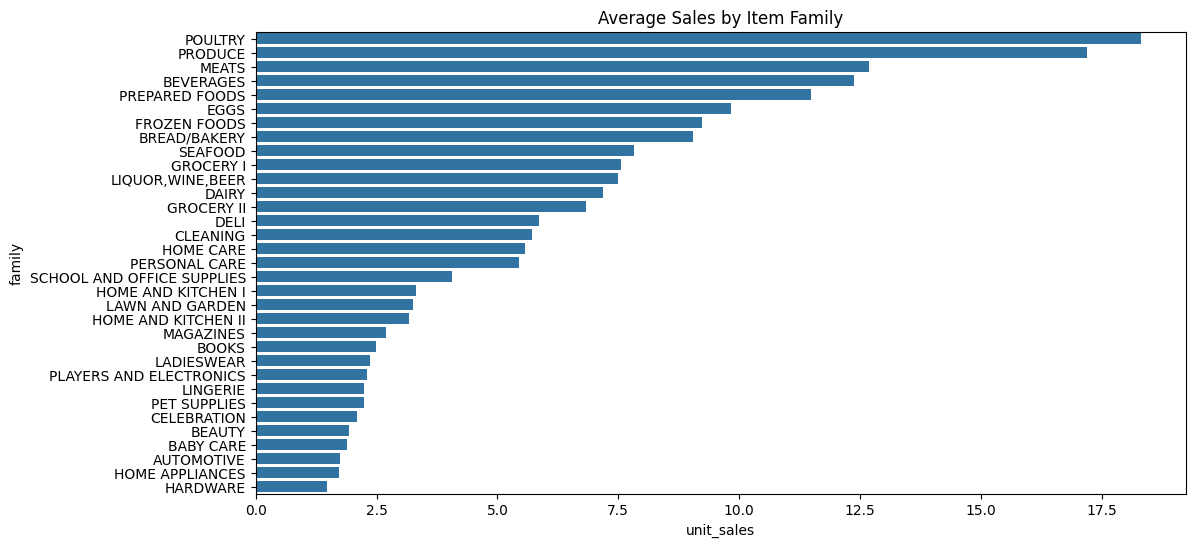

In [10]:
plt.figure(figsize=(12,6))
sns.barplot(data=df.groupby('family')['unit_sales'].mean().reset_index().sort_values('unit_sales', ascending=False), 
            x='unit_sales', y='family')
plt.title("Average Sales by Item Family")

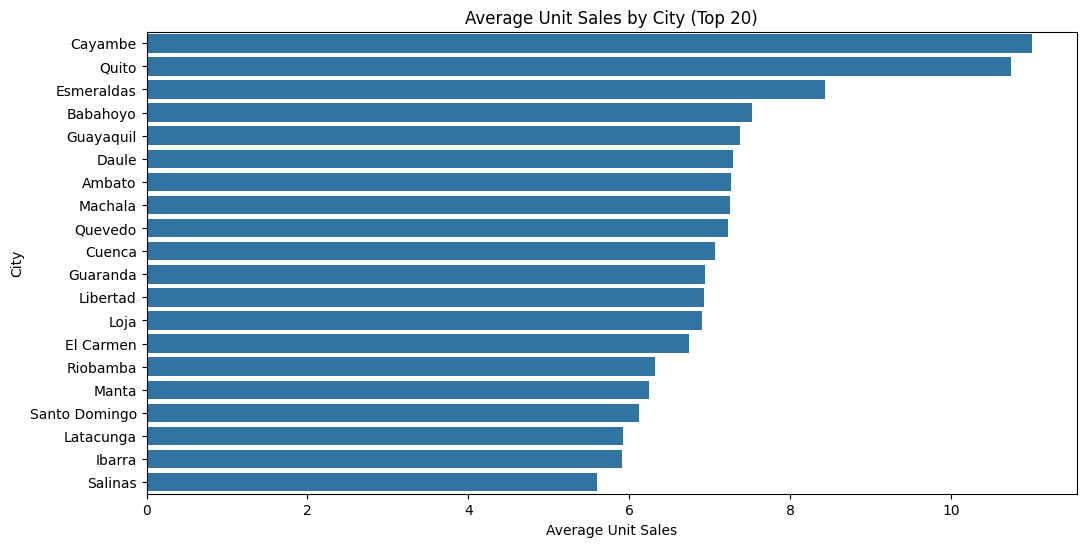

In [6]:
sales_by_city = df.groupby('city')['unit_sales'].mean().sort_values(ascending=False).head(20)  # top 20 cities

plt.figure(figsize=(12,6))
sns.barplot(x=sales_by_city.values, y=sales_by_city.index)
plt.title('Average Unit Sales by City (Top 20)')
plt.xlabel('Average Unit Sales')
plt.ylabel('City')
plt.show()


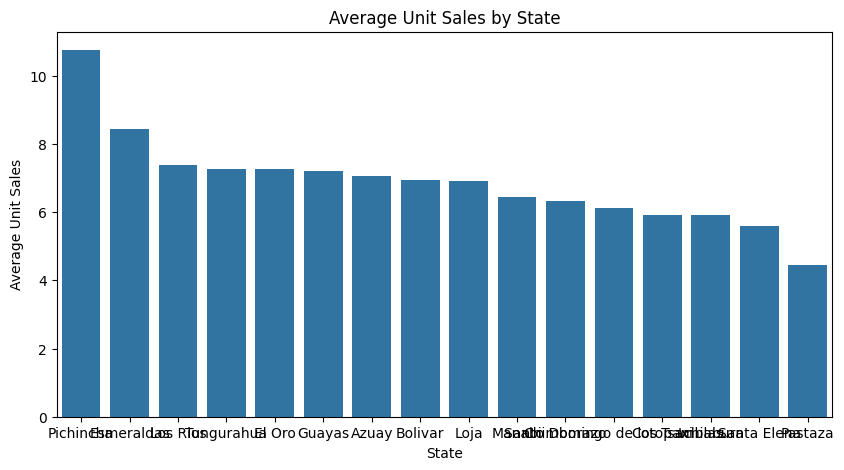

In [7]:
sales_by_state = df.groupby('state')['unit_sales'].mean().sort_values(ascending=False)

# Plot sales by state
plt.figure(figsize=(10,5))
sns.barplot(x=sales_by_state.index, y=sales_by_state.values)
plt.title('Average Unit Sales by State')
plt.xlabel('State')
plt.ylabel('Average Unit Sales')
plt.show()

Text(0.5, 1.0, 'Sales Distribution by Perishability')

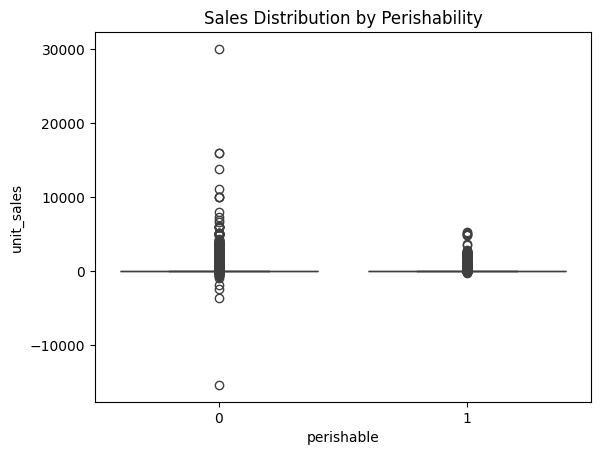

In [11]:
sns.boxplot(data=df, x='perishable', y='unit_sales')
plt.title("Sales Distribution by Perishability")

Text(0.5, 1.0, 'Sales Distribution: Holiday vs Non-Holiday')

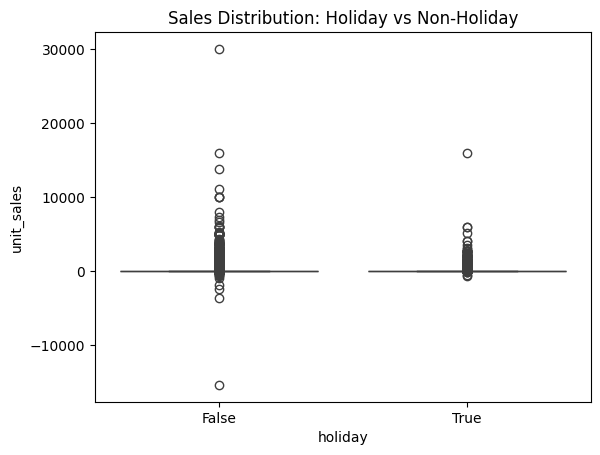

In [12]:
sns.boxplot(data=df, x='holiday', y='unit_sales')
plt.title("Sales Distribution: Holiday vs Non-Holiday")

Text(0.5, 1.0, 'Transactions vs. Sales')

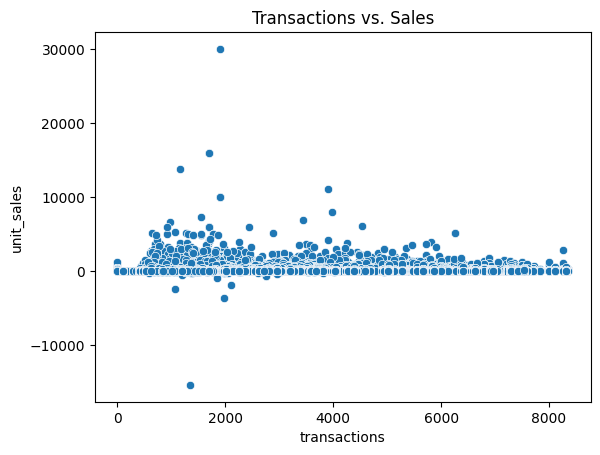

In [13]:
sns.scatterplot(data=df, x='transactions', y='unit_sales')
plt.title("Transactions vs. Sales")

Text(0.5, 1.0, 'Oil Price vs. Sales')

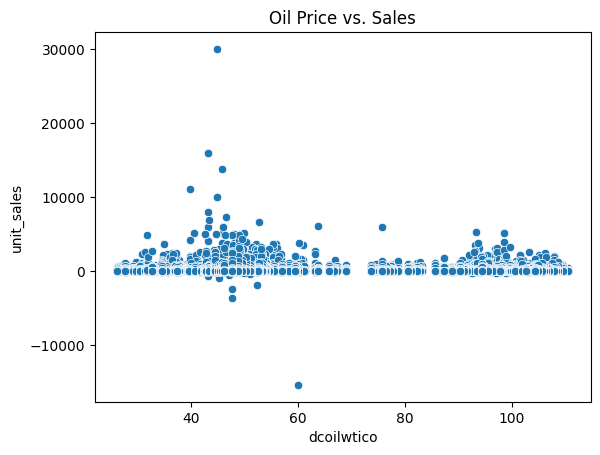

In [14]:
sns.scatterplot(data=df, x='dcoilwtico', y='unit_sales')
plt.title("Oil Price vs. Sales")

Text(0.5, 1.0, 'Stores vs. Sales')

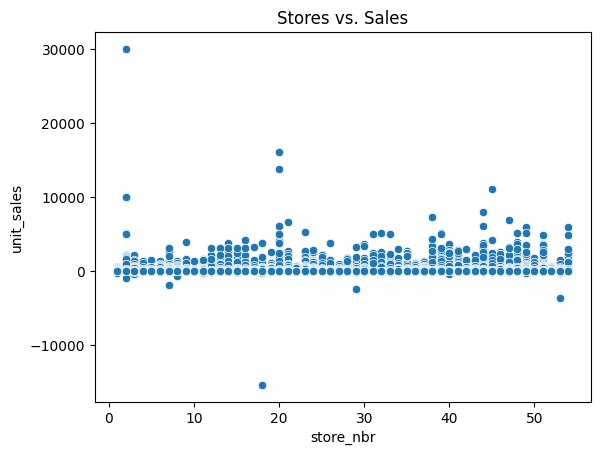

In [15]:
sns.scatterplot(data=df, x='store_nbr', y='unit_sales')
plt.title("Stores vs. Sales")

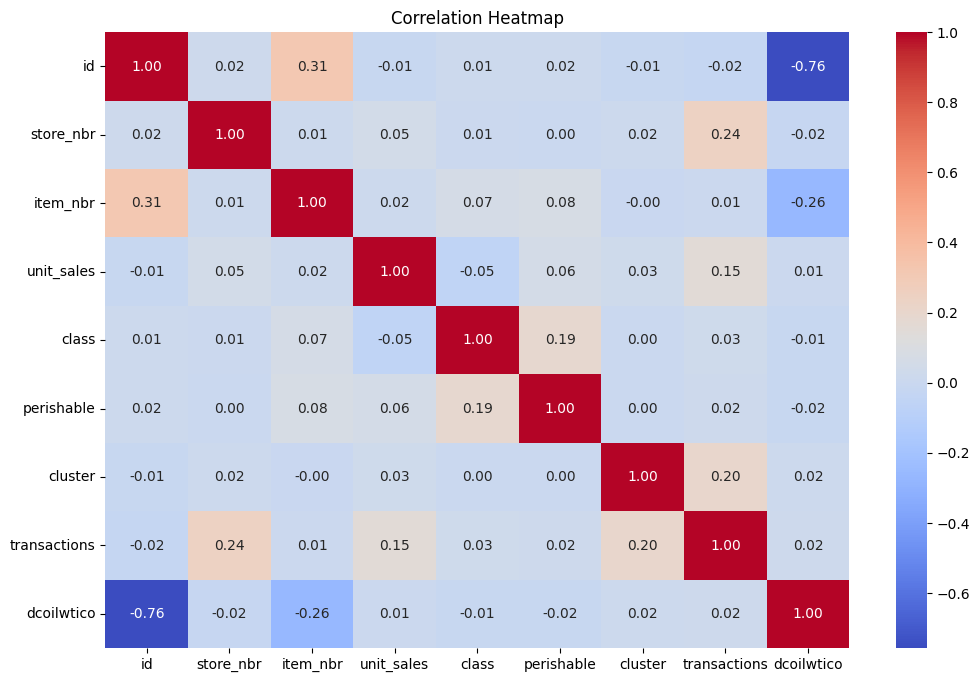

In [17]:
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
df['dayofweek'] = df['date'].dt.dayofweek

In [21]:
dow_map = dict(enumerate(calendar.day_name))
df['dayofweek_name'] = df['dayofweek'].map(dow_map)

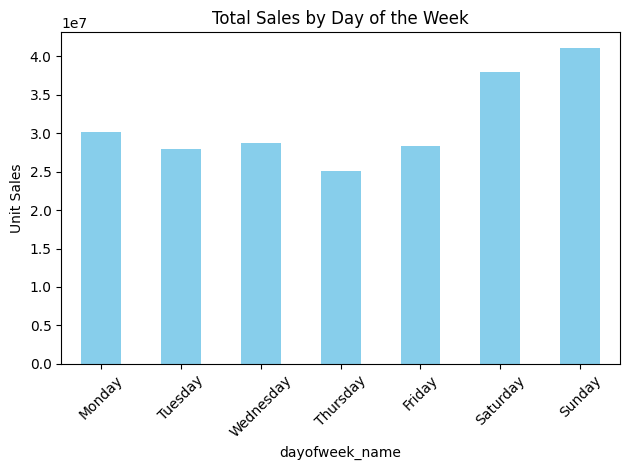

In [ ]:
dow_sales = df.groupby('dayofweek_name')['unit_sales'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

dow_sales.plot(kind='bar', title='Total Sales by Day of the Week', color='skyblue')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

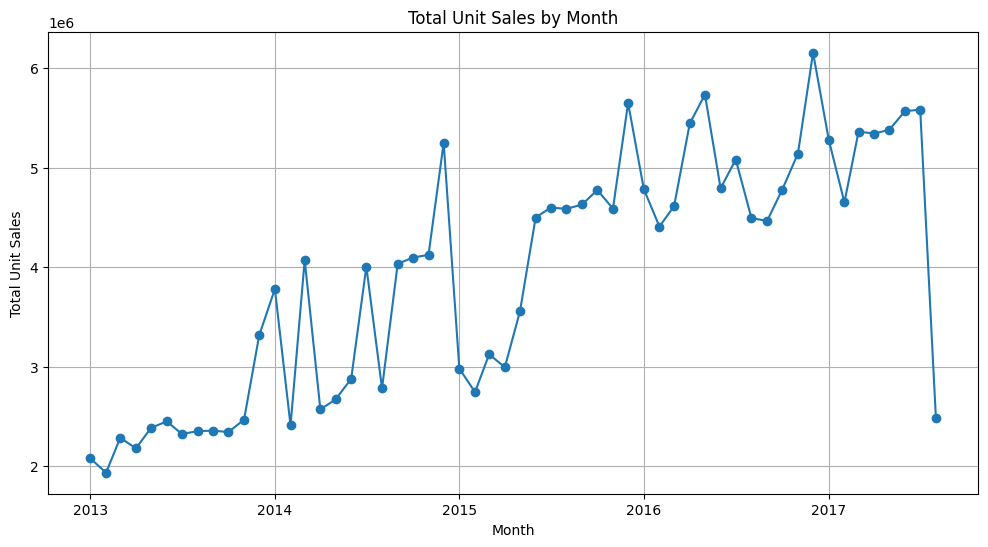

In [ ]:
df['year_month'] = df['date'].dt.to_period('M')

monthly_sales = df.groupby('year_month')['unit_sales'].sum().reset_index()

monthly_sales['year_month'] = monthly_sales['year_month'].dt.to_timestamp()

plt.figure(figsize=(12,6))
plt.plot(monthly_sales['year_month'], monthly_sales['unit_sales'], marker='o')
plt.title('Total Unit Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Unit Sales')
plt.grid(True)
plt.show()

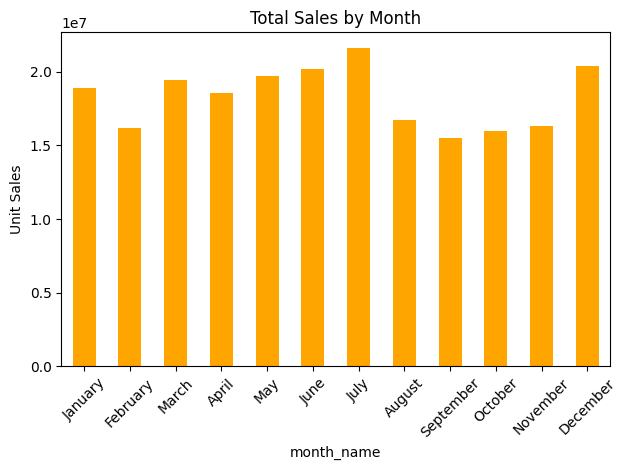

In [ ]:
df['month'] = df['date'].dt.month
month_map = dict(enumerate(calendar.month_name))
month_map = {k: v for k, v in month_map.items() if k != 0}
df['month_name'] = df['month'].map(month_map)

month_order = list(calendar.month_name)[1:]
month_sales = df.groupby('month_name')['unit_sales'].sum().reindex(month_order)

month_sales.plot(kind='bar', title='Total Sales by Month', color='orange')
plt.ylabel('Unit Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()